# **OASIS INFOBYTE INTERNSHIP**
**PROJECT_1  , LEVEL_1**


---


*Idea: Exploratory Data Analysis (EDA) on Retail Sales Data*



**DESCRIPTION:**

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.




**Key Concepts and Challenges:**


1. Data Loading and Cleaning: Load the retail sales dataset.
2. Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
3. Time Series Analysis: Analyze sales trends over time using time series techniques.
4. Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
5. Visualization: Present insights through bar charts, line plots, and heatmaps.
6. Recommendations: Provide actionable recommendations based on the EDA.

# **1**. **DATA LOADING AND CLEANING : LOAD THE RETAIL SALES DATASET.**

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!unzip /content/project_1.zip

Archive:  /content/project_1.zip
  inflating: retail_sales_dataset.csv  


In [4]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'month', 'month_txt'],
      dtype='object')

In [ ]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
month                 12
month_txt             12
dtype: int64

In [ ]:
# Drop missing values
df.dropna(inplace=True)

# Check for duplicates
print(f"Number of duplicates:\n{df.duplicated().sum()}")

Number of duplicates:
0


# **2. DESCRIPTIVE SATISTICS : CALCULATE BASIC STATISTICS (MEAN ,MODE ,MEDIAN AND STANDARD DEVIATION)**

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.mode()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,NaN,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,NaN,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,996,NaN,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,NaN,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


# **3. TIME SERIES ANALYSIS: ANALYZE SALES TRENDS OVER TIME USING TIME SERIES TECHNIQUES**

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df['month'] = df['Date'].dt.month
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [ ]:
df['month_txt'] = df['Date'].dt.month_name().str.slice(stop=3)
df_by_month = df.groupby (['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

<ipython-input-68-1fc11294072a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,month,month_txt,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,Jan,37728,3125,199,14645,36980
1,2,Feb,37699,3320,214,16255,44060
2,3,Mar,34712,3111,194,12620,28990
3,4,Apr,42755,3652,214,12715,33870
4,5,May,53821,4455,259,21255,53150
5,6,Jun,42262,3230,197,14210,36715
6,7,Jul,33398,2960,176,15295,35465
7,8,Aug,50579,4169,227,15465,36960
8,9,Sep,33756,2595,170,8895,23620
9,10,Oct,47163,3975,252,17475,46580


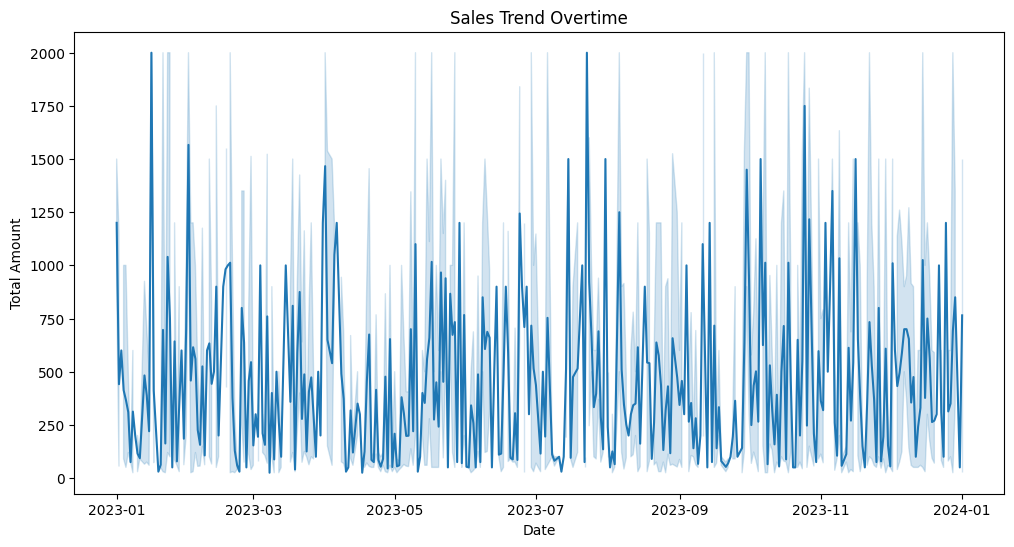

In [ ]:
#Line plot showing the trend of sales overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x = "Date", y = "Total Amount", data = df)
plt.title("Sales Trend Overtime")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

# **4. VISUALIZATION : PRESENTING INSIGHTS THROUGH BAR CHARTS ,LINE PLOTS ,PIE CHART AND HEATMAPS.**

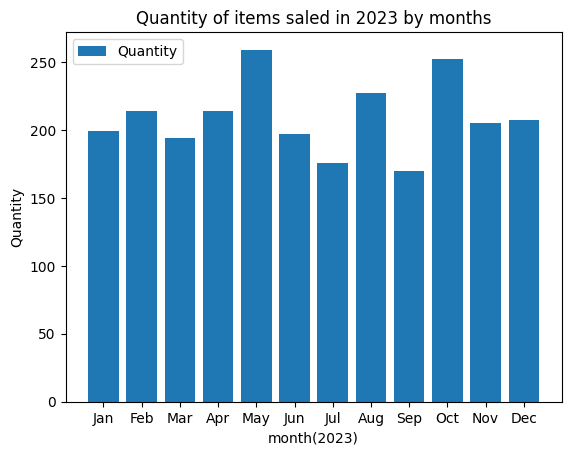

In [ ]:
plt.bar(x=df_by_month['month_txt'], height=df_by_month['Quantity'],label="Quantity")
plt.xlabel('month(2023)')
plt.ylabel('Quantity')
plt.title('Quantity of items saled in 2023 by months')
plt.legend()
plt.show()

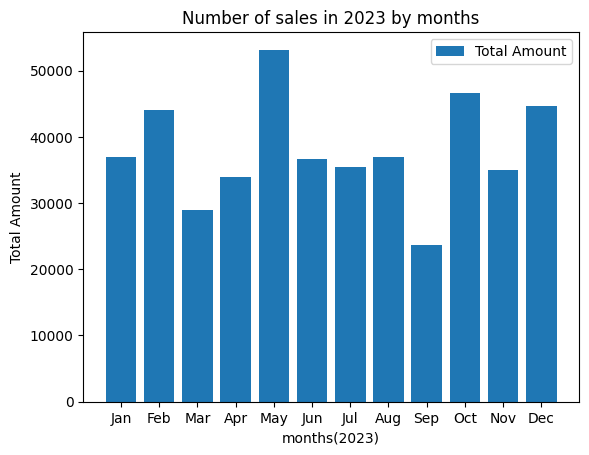

In [ ]:
plt.bar(x=df_by_month['month_txt'], height=df_by_month['Total Amount'],label="Total Amount")
plt.xlabel('months(2023)')
plt.ylabel('Total Amount')
plt.title('Number of transaction IDS in 2023 by months')
plt.legend()
plt.show()

In [ ]:
df['month_txt'] = df['Date'].dt.month
transaction_count = df.groupby('month_txt')['Transaction ID'].count()

In [ ]:
transaction_count

month_txt
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

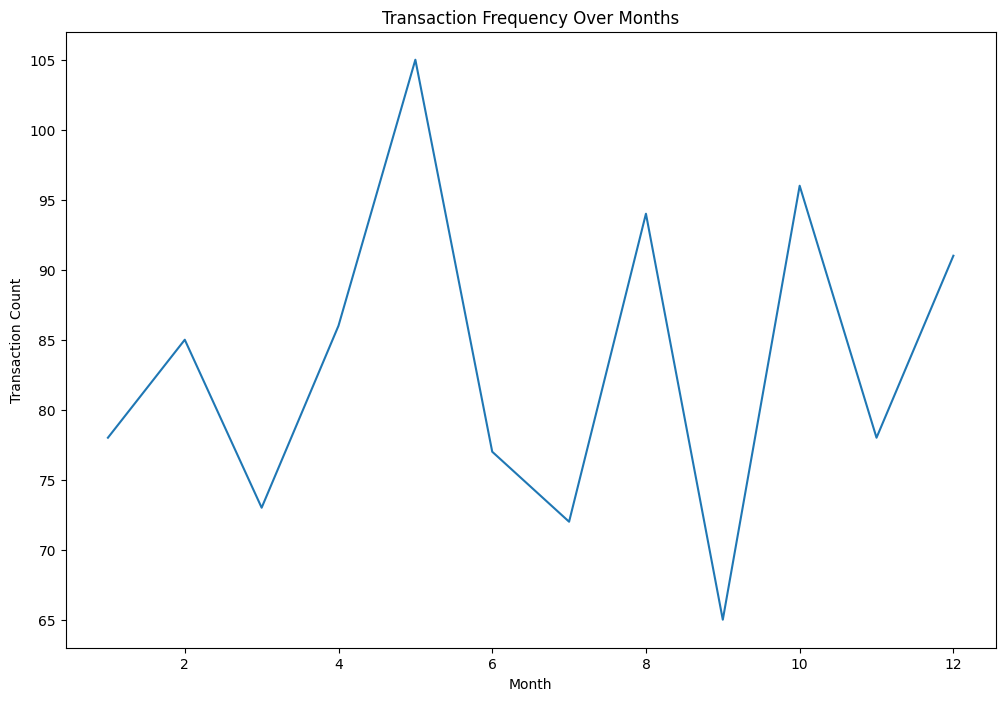

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

In [ ]:
import plotly.express as px
col = 'Product Category'
i = df[col].value_counts().index
v = df[col].value_counts().values

#pie plot
fig = px.pie(names=i, values=v, height=350,width=700,color=i)
fig.update_layout(paper_bgcolor='#A9DFBF')
fig.update_traces(showlegend=False)
fig.update_layout(title=dict(text=f"Pie Plot of {col}", x=0.5, font=dict(size=25)))
fig.update_traces(textinfo='text+percent+label', textfont_color='white',textfont_size=14)
fig.show()

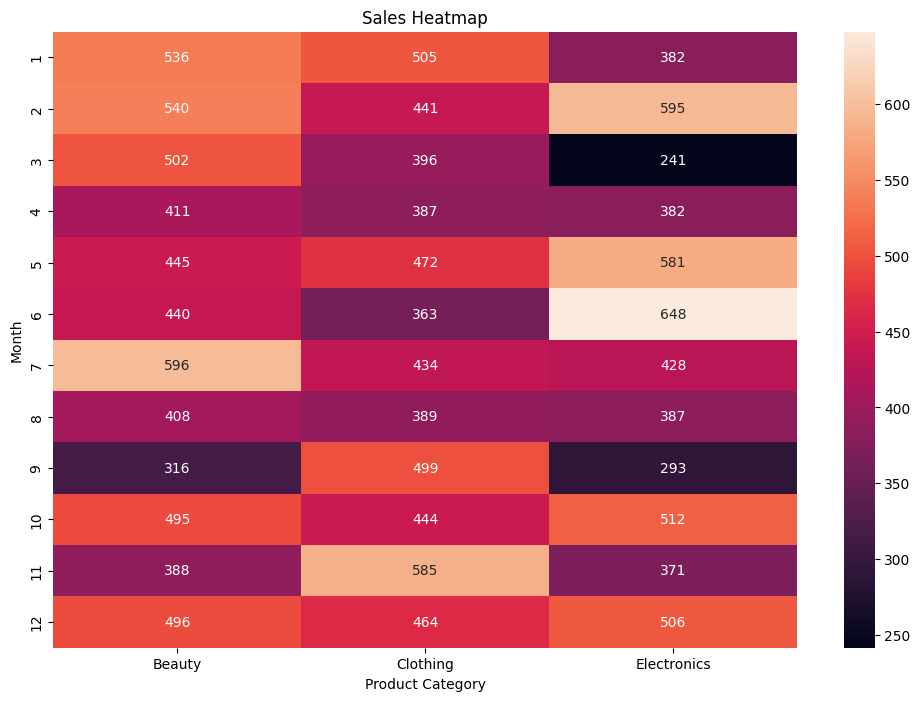

In [ ]:
heatmap = df.pivot_table(index='month_txt', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

# **5. CUSTOMER AND PRODUCT ANALYSIS:ANALYZE CUSTOMER DEMOGRAPHICS AND PURCHASING BEHAVIOUR.**

<ipython-input-64-501c31d49956>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




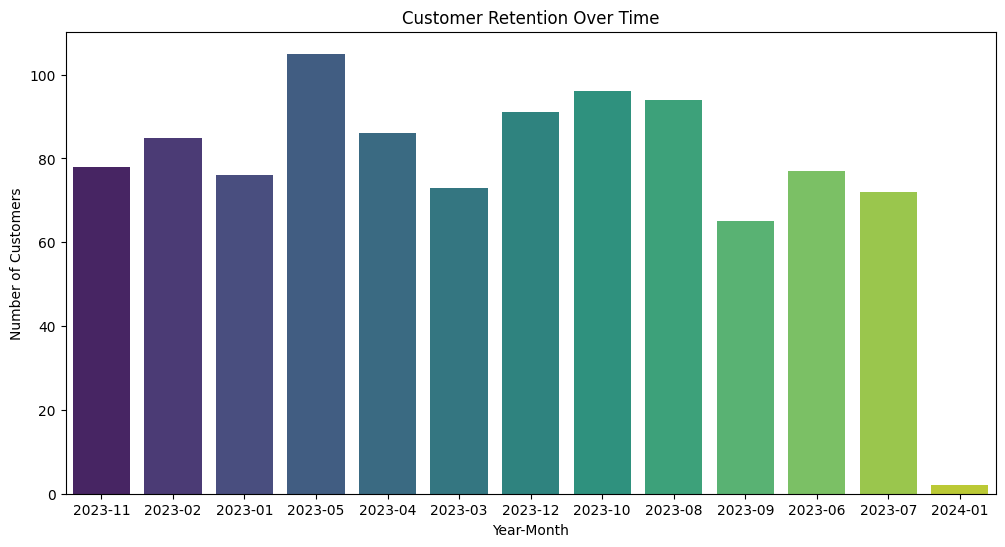

In [ ]:
customer_retention = df.groupby('Customer ID')['Date'].min().reset_index()
customer_retention['YearMonth'] = customer_retention['Date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x='YearMonth', data=customer_retention, palette='viridis')
plt.title('Customer Retention Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.show()

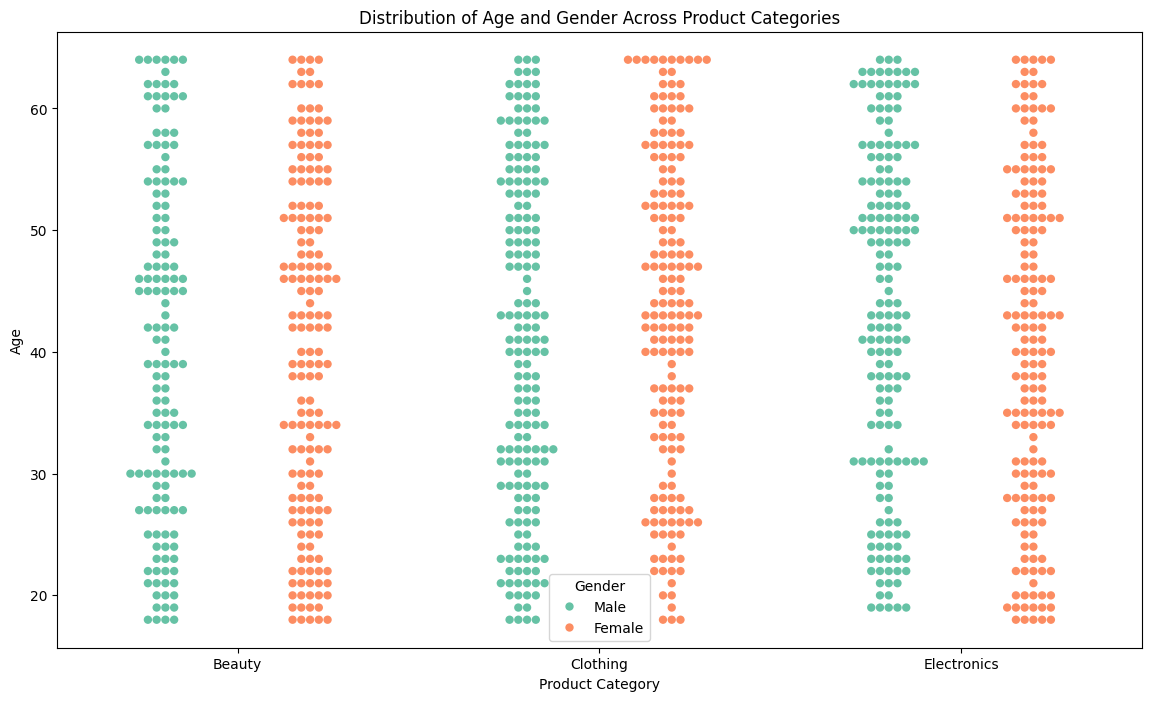

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, size=6, palette="Set2", dodge=True)
plt.title('Distribution of Age and Gender Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.legend(title='Gender')

plt.show()

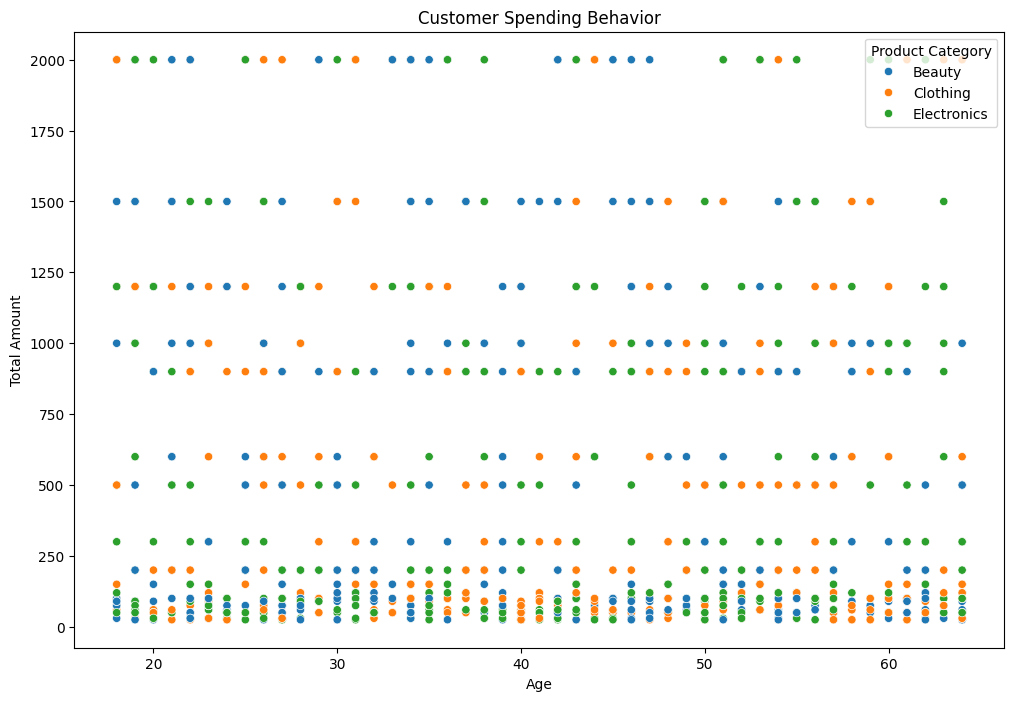

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Product Category')
plt.title('Customer Spending Behavior')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()

# **6. Recommendations: Provide actionable recommendations based on the EDA .**

In [ ]:
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

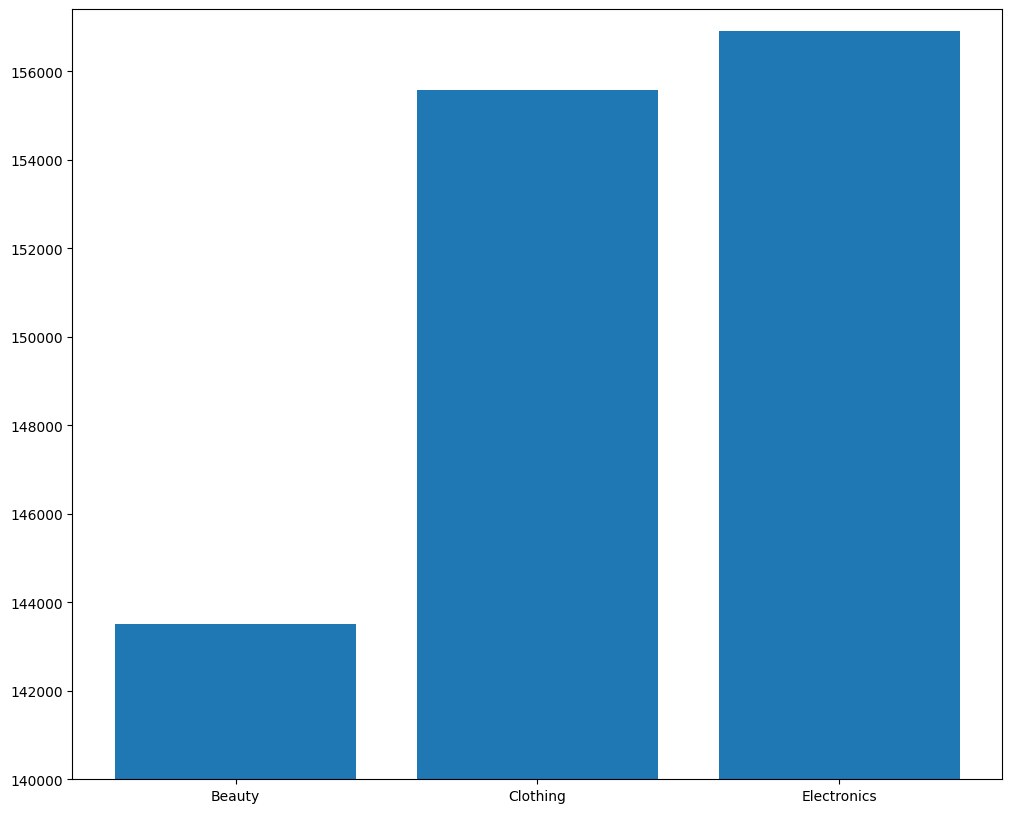

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(df.groupby('Product Category')['Total Amount'].sum().index,df.groupby('Product Category')['Total Amount'].sum())
plt.ylim(140000, max(df.groupby('Product Category')['Total Amount'].sum()) + 500)
plt.show()
# A bar chart to show the overall sales of product according to product category.

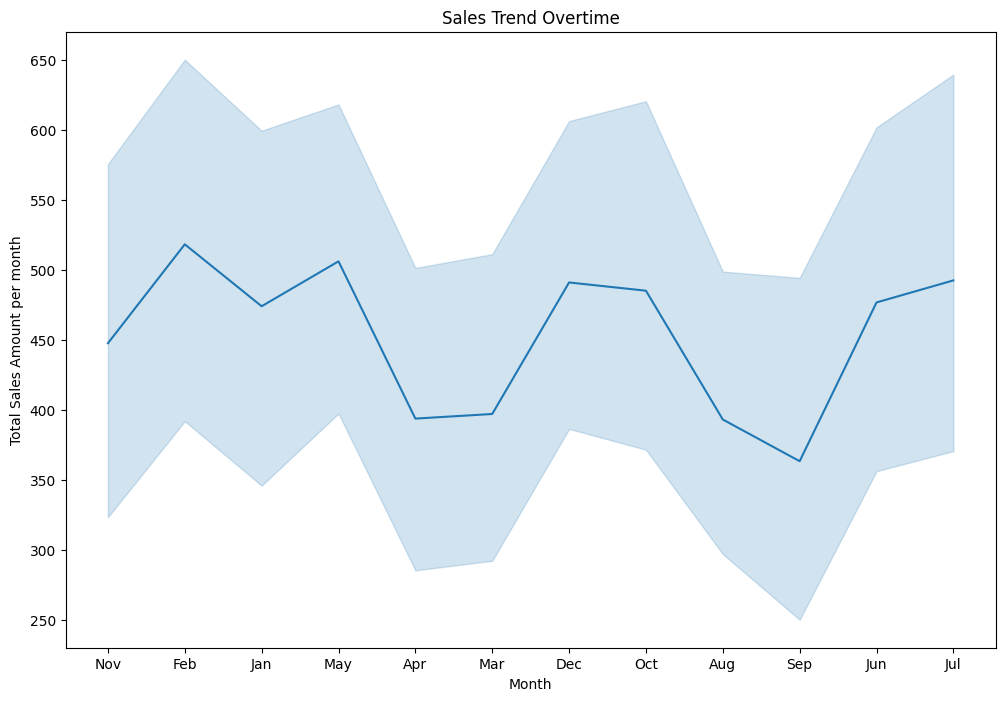

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='month_txt', y='Total Amount', data=df)
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()